# [Word2Vec](https://glanceyes.com/entry/Word-Embedding%EA%B3%BC-Word2Vec)
- Word2Vec은 word embedding을 학습시키는 가장 유명한 방법 중 하나이다.
- 어떠한 단어가 서로 유사한 의미를 지니는지를 학습하기 위해 Word2Vec에서는 같은 문장에서 나타난 인접 단어들 간의 의미가 서로 유사할 것이라는 가정을 전제로 가져간다.
- 즉, 어떤 한 단어가 주변에 등장하는 단어를 통해 그 의미를 유추할 수 있다는 아이디어에서 출발한 방법이며, 주어진 학습 데이터를 바탕으로 특정 단어의 주변에 나타나는 단어의 등장 확률 분포를 예측하게 된다.

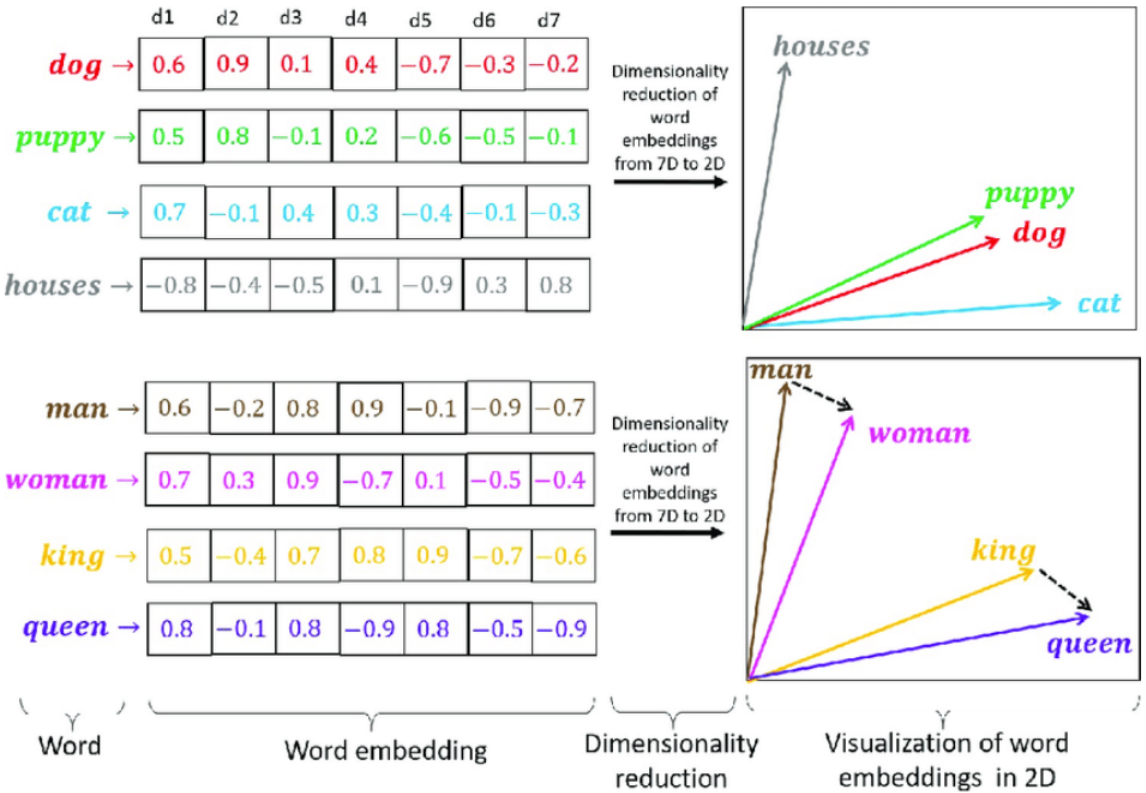

## [Word2Vec 학습과정](https://glanceyes.com/entry/Word-Embedding%EA%B3%BC-Word2Vec#toc-link-4)

1. tokenizing을 통한 Vocabulary 구축

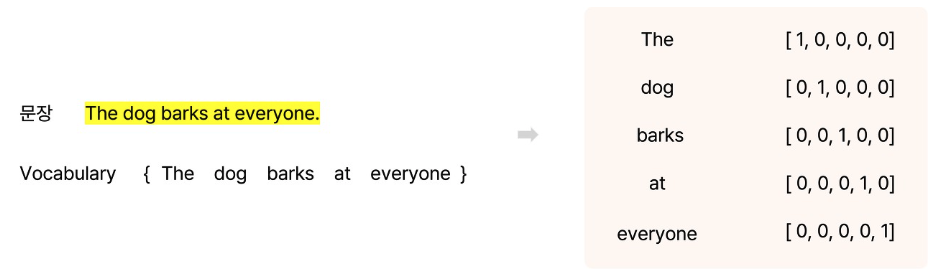

2. sliding window
  - Word2Vec에서는 인접한 단어의 의미적인 유사성을 파악하기 위해 슬라이딩 윈도우(sliding window) 기법을 사용하는데, 이는 중심 단어로부터 얼마나 멀리 떨어져 있는 단어까지 유사한 관계로 학습할지를 반영하기 위함이다.
  - 그래서 슬라이딩 윈도우 기법을 적용하여 어떤 한 단어를 중심으로 앞뒤로 나타나는 각각의 단어와 짝을 지어 입출력 쌍을 구성한다.

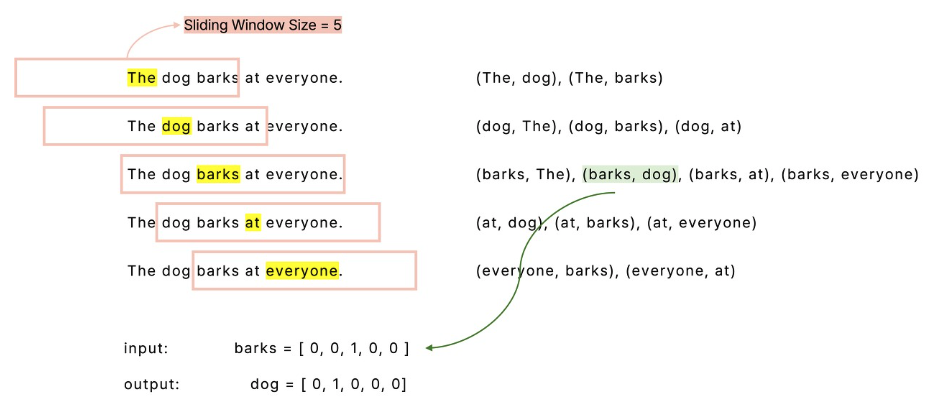

3. 행렬연산을 이용하여 의미적인 유사성 파악
  - 이 예시에서 One-hot vector의 차원 수이자 전체 단어의 개수가 5이므로 input layer와 output layer의 node 개수는 5가 된다.
  - Hidden layer의 node 수는 사용자가 정하는 하이퍼파라미터이며, word embedding을 수행하는 좌표 공간의 차원 수의 동일한 값으로 설정한다.
  - 이번 예시에서는 차원이 3인 임베딩 공간에서 임베딩을 수행한다고 가정하여 hidden layer의 node 수를 3으로 설정했다.

또한 각 layer 사이의 파라미터에 주목할 필요가 있다. 위의 예시에서 Input layer에서 hidden layer로 가는 파라미터를 $W_1$, hidden layer에서 output layer로 가는 파라미터를 $W_2$라고 하자.
- $W_1$를 행렬로 나타냈을 때의 크기는 (임베딩 차원 수) × (one-hot vector 차원 수)이고, $W_2$는 (one-hot vector 차원 수) × (임베딩 차원 수)이다.

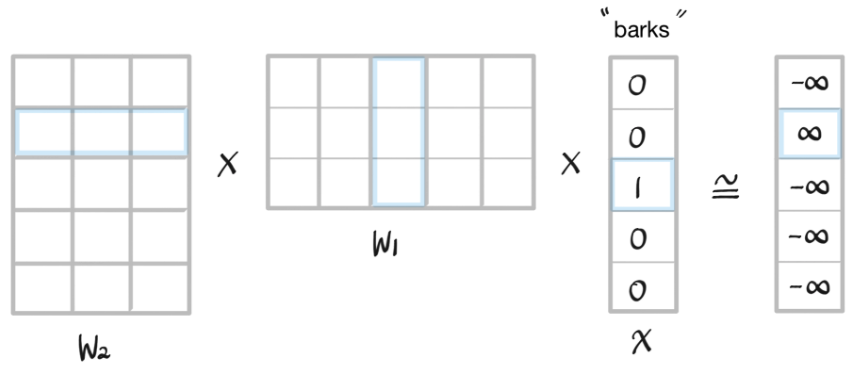

4. softmax
  - 위에서 구한 결과를 $W_2$의 row vector와 곱해서 나온 결과에 softmax를 취해서 나오는 확률 분포가 ground truth인 "dog"의 one-hot vector와 유사해지도록 학습해야 한다.
  - 그래서 $W_2W_1x$의 결과에다가 softmax를 취해서 0과 1사이의 확률 값으로 나타내도록 하여 output $y$과 얼마나 차이나는지 loss를 구하고 이를 줄이는 방향으로 학습을 진행한다.

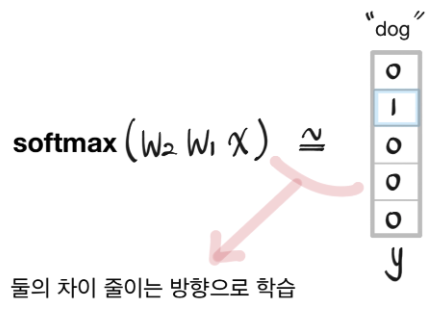

## Word2Vec 학습방법

- 단어의 빈도를 기준으로 단어의 벡터화(`Bag of Words`)를 하여 특징을 추출하는 방법은 단어 사이의 유사도를 나타내기 힘들다. 단어의 특징과 유사도를 나타내 주는 방법이 `Word2Vec`이다.
- Word2Vec에는 `CBow`와 `Skip-gram`이 있다. `CBOW`는 어떤 단어를 문맥 안의 주변 단어들을 통해 예측하는 방법이고, `Skip-gram`은 반대로 어떤 단어를 가지고 특정 문맥 안의 주변 단어들을 예측하는 과정이다.

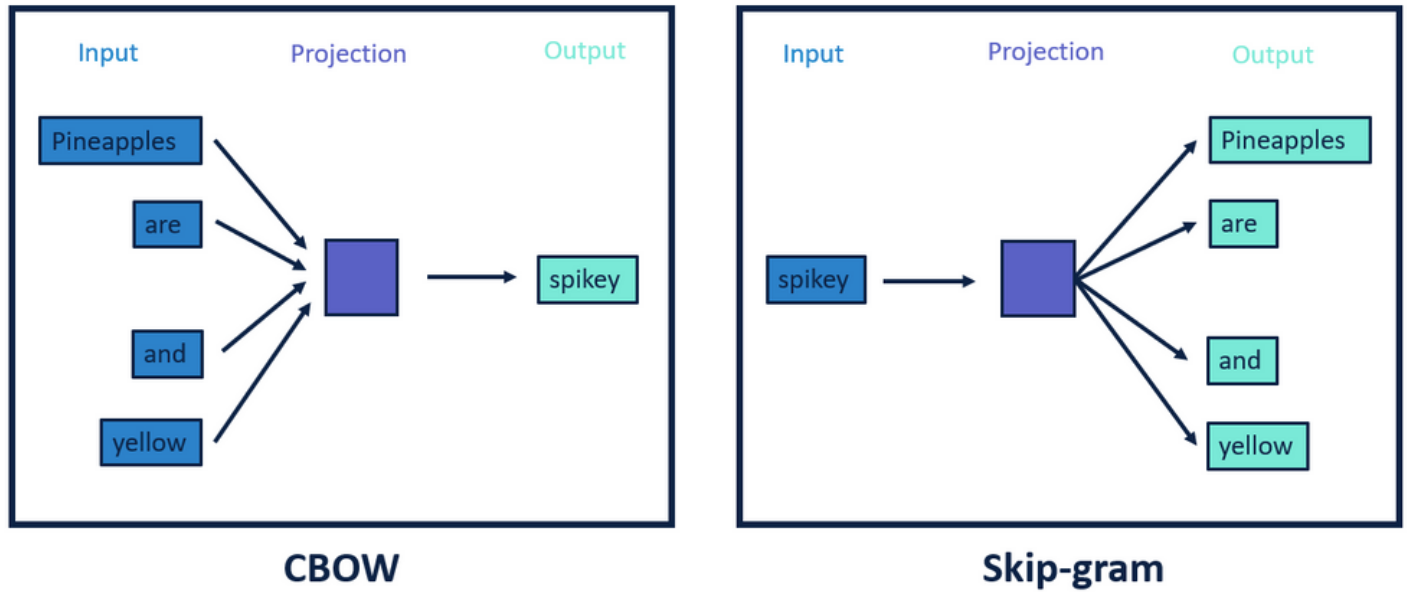

## 학습 결과를 시각화한 사이트
- https://ronxin.github.io/wevi/

# [Word2Vec 모델 학습](https://wikidocs.net/50739)

## [Load Data](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews)

In [1]:
# 구글 드라이브 연결(데이터 로드를 위해서)
from google.colab import drive
drive.mount('/content/data')

Mounted at /content/data


In [2]:
import numpy as np
import pandas as pd

DATA_PATH = "/content/data/MyDrive/google_lecture/06. deep learning/3. NLP Pytorch/data/IMDB/"
df = pd.read_csv(DATA_PATH + "IMDB-Dataset.csv")

# df = df[:5000]
print(f'{df.shape}')
df.head()

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## Token

In [3]:
import nltk

nltk.download("punkt")
nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [4]:
from tqdm import tqdm

tokenized_data = []
for sentence in tqdm(df['review']):
    sentence = sentence.lower() # 대문자를 소문자로 변환
    sentence = sentence.replace('<br />', '') # 필요없는 문자 제거
    tokenized_sentence = nltk.word_tokenize(sentence) # 토큰화
    tokenized_data.append(tokenized_sentence)

100%|██████████| 50000/50000 [01:15<00:00, 662.78it/s]


In [17]:
len(tokenized_data)

50000

In [6]:
df.head(1)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive


In [7]:
tokenized_data[0][:5]

['one', 'of', 'the', 'other', 'reviewers']

In [8]:
df.head(2)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive


In [9]:
tokenized_data[1][:7]

['a', 'wonderful', 'little', 'production', '.', 'the', 'filming']

리뷰의 최대 길이 : 2730
리뷰의 평균 길이 : 261.77634


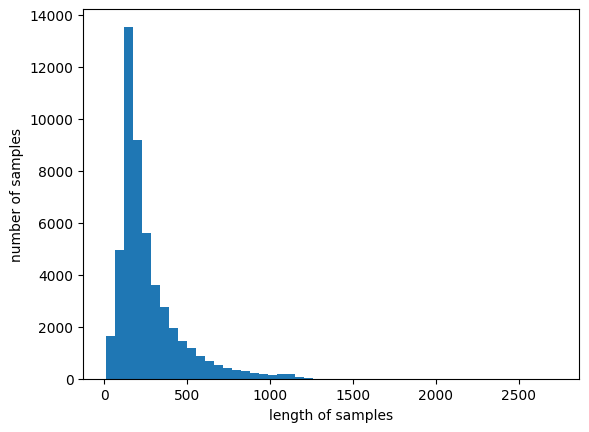

In [10]:
import matplotlib.pyplot as plt

# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :',max(len(review) for review in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))

plt.hist([len(review) for review in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

## Train
- vector_size: 임베딩 된 벡터의 차원
- window: 컨텍스트 원도우 크기
- min_count: 단어 최소 빈도 수 제한(빈도가 적은 단어들은 학습하지 않는다.)
- workers: 학습을 위한 프로세스 수
- sg: 0(CBOW), 1(Skip-gram)

In [11]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = tokenized_data, vector_size = 300, window = 5, min_count = 5, workers = -1, sg = 0)

학습 모델을 이용한 유사 단어 확인
> 데이터가 많지 않아서 학습이 잘되지 않았음

In [19]:
model_result = model.wv.most_similar("wonderful")
print(model_result)

[('lilliput', 0.22179092466831207), ('intellectually', 0.21859486401081085), ('hordes', 0.2111765593290329), ('gypsies', 0.20655690133571625), ('goldeneye', 0.2050001621246338), ('bam', 0.19880861043930054), ('fortier', 0.19827546179294586), ('ingmar', 0.19663165509700775), ('empress', 0.19342432916164398), ('.sadly', 0.1930973082780838)]


In [24]:
model.wv.vectors.shape # (학습한 단어의 총 수(단어집의 크기), 벡터 크기)

(43746, 300)

# Pre-trained Word2Vec
> [사전 학습된 모델](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?resourcekey=0-wjGZdNAUop6WykTtMip30g)

In [13]:
import gensim
from gensim.test.utils import datapath
import urllib.request

# 구글의 사전 훈련된 Word2Vec 모델을 로드.
DATA_PATH = "/content/data/MyDrive/google_lecture/06. deep learning/3. NLP Pytorch/models/"

word2vec_model = gensim.models.KeyedVectors.load_word2vec_format(DATA_PATH+'GoogleNews-vectors-negative300.bin.gz', binary=True)

In [14]:
print(word2vec_model.vectors.shape) # (학습한 단어의 총 수(단어집의 크기), 벡터 크기)

(3000000, 300)


In [15]:
print(word2vec_model.similarity('man', 'woman'))

0.76640123


In [16]:
model_result = word2vec_model.most_similar("wonderful")
print(model_result)

[('marvelous', 0.8188856244087219), ('fantastic', 0.8047919869422913), ('great', 0.7647867798805237), ('fabulous', 0.7614760994911194), ('terrific', 0.7420831918716431), ('lovely', 0.7320096492767334), ('amazing', 0.7263179421424866), ('beautiful', 0.6854085922241211), ('magnificent', 0.6633867025375366), ('delightful', 0.6574996709823608)]
